<a href="https://colab.research.google.com/github/rafif22-sys/2025_VisiKomputer_TI-2A/blob/main/Jobsheet02_VisiKomputer_RafifAli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

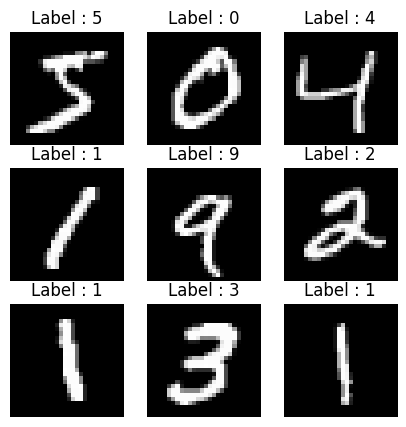

In [ ]:
#PRAKTIKUM 1
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

#Load Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Tampilkan Contoh
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i],cmap='gray')
  plt.title(f"Label : {y_train[i]}")
  plt.axis('off')
plt.show()

In [ ]:
# Praktikum 2
from sklearn import svm
from sklearn.metrics import accuracy_score

#Flattern
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1)/ 255.0

#SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])
y_pred =  clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9101


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.8984 - loss: 0.3488 - val_accuracy: 0.9823 - val_loss: 0.0649
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9813 - loss: 0.0625 - val_accuracy: 0.9838 - val_loss: 0.0611
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9869 - loss: 0.0423 - val_accuracy: 0.9863 - val_loss: 0.0523
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9905 - loss: 0.0300 - val_accuracy: 0.9857 - val_loss: 0.0506
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9938 - loss: 0.0198 - val_accuracy: 0.9880 - val_loss: 0.0471


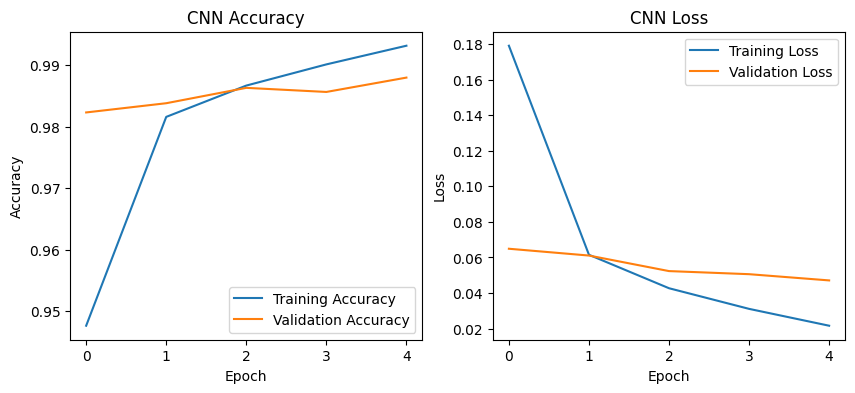

In [ ]:
# Praktikum 3
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )
history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)
# ==== Plot History ====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 53s 37ms/step - accuracy: 0.3751 - loss: 1.7034 - val_accuracy: 0.5556 - val_loss: 1.2533
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.5907 - loss: 1.1658 - val_accuracy: 0.6338 - val_loss: 1.0265
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 35ms/step - accuracy: 0.6523 - loss: 1.0053 - val_accuracy: 0.6670 - val_loss: 0.9760
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 49s 35ms/step - accuracy: 0.6848 - loss: 0.9127 - val_accuracy: 0.6858 - val_loss: 0.9132
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.7096 - loss: 0.8318 - val_accuracy: 0.6996 - val_loss: 0.8901
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.7314 - loss: 0.7715 - val_accuracy: 0.7026 - val_loss: 0.8732
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.7506 - loss: 0.7169 - val_accuracy: 0.6882 - val_loss: 0.9161
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.7690 -

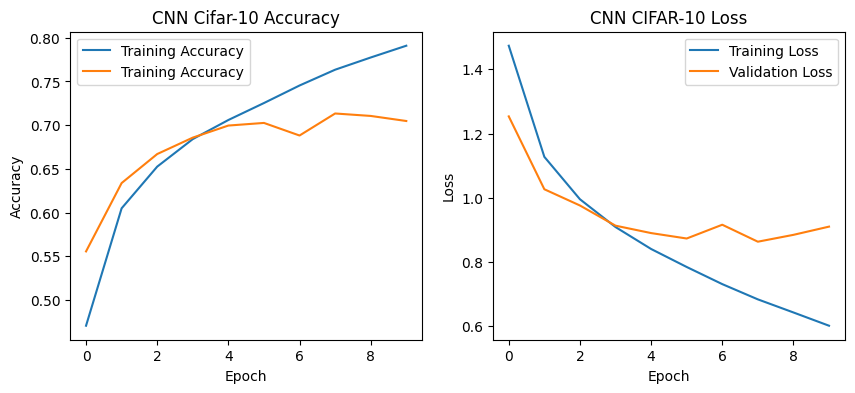

In [21]:
# PRAKTIKUM 4
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

history = model.fit(x_train, y_train, epochs=10, validation_split = 0.1)

# ====== PLOT HISTORY ====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Cifar-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()



In [ ]:
# Praktikum 5
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights = 'imagenet',include_top = False, input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, ephocs=5, validation_split = 0.1)
# ==== Plot History =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history,history['accuracy'],label='Training Accuracy')
plt.plot(history,history['val_accuracy'],label='Training Accuracy')

